In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Leer imágenes 

Este código está diseñado para recorrer un directorio específico y sus subdirectorios, leer todas las imágenes con extensiones .jpg, .jpeg, .png, .bmp, o .tiff, y almacenar información sobre estas imágenes y los directorios donde se encuentran.

In [2]:
dirname = os.path.join(os.getcwd(),'/git/IAClass/16_projectU3_cnn_cars/dataset/')
# dirname = os.path.join(os.getcwd(),'/git/IAClass/assets/projectU3/dataset')
# imgpath = dirname + os.sep 
# imgpath = 'C:/git/IAClass/16_projectU3_cnn_cars/dataset/'

imgpath = os.path.join(os.getcwd(),'/git/IAClass/16_projectU3_cnn_cars/dataset/')




images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            #print (b, end="\r")
            if prevRoot !=root:
                #print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:/git/IAClass/16_projectU3_cnn_cars/dataset/
Directorios leidos: 5
Imagenes en cada directorio [16541, 17940, 16220, 15790, 16769]
suma Total de imagenes en subdirs: 83260


# Generación de Etiquetas 

Esta sección del código está asignando una etiqueta numérica a cada imagen basada en el directorio del que proviene. Si un directorio tiene 5 imágenes, todas esas imágenes tendrán la misma etiqueta (por ejemplo, 0), y luego la etiqueta cambiará para el próximo directorio. Esto es útil para clasificar las imágenes según sus directorios de origen.

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  83260


Esta sección del código permite identificar y almacenar los nombres de los subdirectorios de manera organizada, lo cual puede ser útil para el análisis posterior o para referenciar los datos procesados.

In [4]:
sriesgos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    sriesgos.append(name[len(name)-1])
    indice=indice+1

0 c:/git/IAClass/16_projectU3_cnn_cars/dataset/ford_fiesta_zetec
1 c:/git/IAClass/16_projectU3_cnn_cars/dataset/mazda_iconic_sp
2 c:/git/IAClass/16_projectU3_cnn_cars/dataset/mini_cooper_d
3 c:/git/IAClass/16_projectU3_cnn_cars/dataset/rover_p6_3500s
4 c:/git/IAClass/16_projectU3_cnn_cars/dataset/volkswagen_up


Esta sección del código convierte las listas de etiquetas e imágenes en arreglos de NumPy para facilitar su manipulación. Luego, identifica las clases únicas presentes en las etiquetas y calcula el número total de clases, imprimiendo esta información. Esto es útil para entender la distribución de las clases en el conjunto de datos y preparar los datos para análisis o entrenamiento de modelos.

In [5]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


Esta sección del código divide el conjunto de datos en dos partes: datos de entrenamiento (80%) y datos de prueba (20%). Luego, imprime las dimensiones de estos conjuntos de datos. Esta división es crucial en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático, ya que permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [6]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.5)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (41630, 21, 28, 3) (41630,)
Testing data shape :  (41630, 21, 28, 3) (41630,)


Esta sección del código utiliza Matplotlib para mostrar las primeras imágenes de los conjuntos de datos de entrenamiento y de prueba, junto con sus etiquetas correspondientes.

Text(0.5, 1.0, 'Ground Truth : 0')

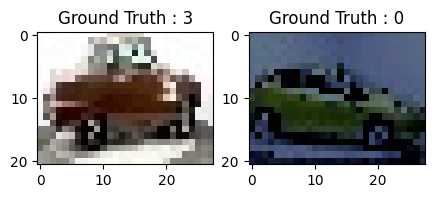

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Esta sección del código convierte los datos de imágenes a tipo de dato float32 y normaliza los valores de píxel para que estén en el rango [0, 1]. Luego, visualiza una imagen del conjunto de datos de prueba. La normalización es crucial para el entrenamiento efectivo de modelos de aprendizaje automático.

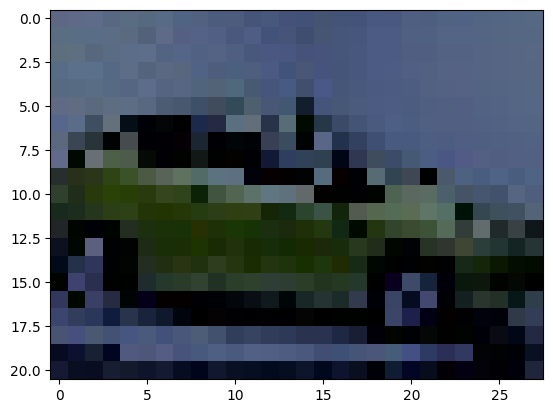

In [8]:
rain_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

Esta sección del código convierte las etiquetas de clase en formato entero a un formato de codificación one-hot. Esto es importante porque muchos algoritmos de aprendizaje automático, especialmente las redes neuronales, funcionan mejor con etiquetas en formato one-hot. Luego, se imprime una etiqueta antes y después de la conversión para verificar el proceso.

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


Esta sección del código toma el conjunto de datos de entrenamiento y lo divide en dos conjuntos: uno para continuar el entrenamiento y otro para la validación. La validación es una parte crucial del proceso de entrenamiento de modelos de aprendizaje automático porque permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, ayudando a prevenir el sobreajuste.

In [10]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.5, random_state=13)

Esta sección del código es útil para verificar que los conjuntos de datos se han dividido correctamente y que las formas de los datos son las esperadas. Esto asegura que los datos estén listos para ser utilizados en el entrenamiento y validación del modelo.

In [11]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(20815, 21, 28, 3) (20815, 21, 28, 3) (20815, 5) (20815, 5)


Esta sección del código define y configura varios parámetros importantes para el entrenamiento de una red neuronal. Estos parámetros incluyen la tasa de aprendizaje inicial, el número de épocas y el tamaño del lote.

In [12]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

Esta sección del código define un modelo de red neuronal convolucional (CNN) utilizando la API de Keras. La red consta de varias capas, incluyendo capas convolucionales, de activación, de pooling, de normalización (Dropout) y densas (fully connected).

In [ ]:

#Esta consiguración tiene sobreajuste durante el entrenamiento
riesgo_model = Sequential()
riesgo_model.add(Input(shape=(21,28,3)))
riesgo_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
riesgo_model.add(MaxPooling2D((2, 2),padding='same'))
riesgo_model.add(Dropout(0.8))

riesgo_model.add(Flatten())
riesgo_model.add(Dense(32, activation='relu'))
riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
riesgo_model.add(Dropout(0.8))
riesgo_model.add(Dense(nClasses, activation='softmax'))

# riesgo_model = Sequential()
# riesgo_model.add(Input(shape=(21,28,3)))
# riesgo_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
# riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
# riesgo_model.add(MaxPooling2D((2, 2),padding='same'))
# riesgo_model.add(Dropout(0.7))

# riesgo_model.add(Flatten())
# riesgo_model.add(Dense(32, activation='linear'))
# riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
# riesgo_model.add(Dropout(0.7))
# riesgo_model.add(Dense(nClasses, activation='softmax'))

# riesgo_model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(21, 28, 3)),
#     Dropout(0.2),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     Dropout(0.3),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     Dropout(0.4),
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), activation='relu'),
#     Dropout(0.5),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(nClasses, activation='softmax')
# ])

# riesgo_model = Sequential()
# riesgo_model.add(Input(shape=(21,28,3)))

# riesgo_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
# riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
# riesgo_model.add(MaxPooling2D((2, 2),padding='same'))
# riesgo_model.add(Dropout(0.7))

# riesgo_model.add(Flatten())
# riesgo_model.add(Dense(32, activation='linear'))
# riesgo_model.add(LeakyReLU(negative_slope=0.1))  # Cambiado de alpha a negative_slope
# riesgo_model.add(Dropout(0.7))
# riesgo_model.add(Dense(nClasses, activation='softmax'))
































In [14]:
riesgo_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,789 (620.27 KB)

 Trainable params: 158,789 (620.27 KB)

 Non-trainable params: 0 (0.00 B)

Esta sección del código configura la función de pérdida, el optimizador y las métricas que se utilizarán durante el entrenamiento del modelo. La compilación del modelo es un paso crucial que prepara el modelo para ser entrenado con los datos.

In [15]:
#riesgo_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
# riesgo_model.compile(
#     loss=keras.losses.categorical_crossentropy, 
#     optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
#     metrics=['accuracy']
# )

riesgo_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR),
    metrics=['accuracy']
)


Esta sección del código entrena el modelo de red neuronal convolucional utilizando los datos de entrenamiento. Durante el entrenamiento, el modelo se ajusta iterativamente a los datos, actualizando sus parámetros para minimizar la función de pérdida. El conjunto de datos de validación se utiliza para monitorear el rendimiento del modelo y prevenir el sobreajuste.

In [16]:
riesgo_train = riesgo_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3292 - loss: 1.7301 - val_accuracy: 0.4429 - val_loss: 1.5173
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4134 - loss: 1.5393 - val_accuracy: 0.5890 - val_loss: 1.4685
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4438 - loss: 1.4939 - val_accuracy: 0.8376 - val_loss: 1.4096
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4678 - loss: 1.4509 - val_accuracy: 0.8557 - val_loss: 1.3374
Epoch 5/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4898 - loss: 1.4012 - val_accuracy: 0.8925 - val_loss: 1.2617
Epoch 6/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4981 - loss: 1.3430 - val_accuracy: 0.9067 - val_loss: 1.1587
Epoch 7/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5272 - loss: 1.2659 - val_accuracy: 0.9129 - val_loss: 1.0367
Epoch 8/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5484 - loss: 1.1898 - val_accuracy: 0.

In [17]:
# riesgo_model.save("C:/git/IAClass/16_projectU3_cnn_cars/dataset_trained/v3/riesgo.h5")
riesgo_model.save("C:/git/IAClass/16_projectU3_cnn_cars/dataset_trained/v1/chatarras.keras")


In [18]:
test_eval = riesgo_model.evaluate(test_X, test_Y_one_hot, verbose=1)

1301/1301 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.3466


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3447035849094391
Test accuracy: 0.9607734680175781


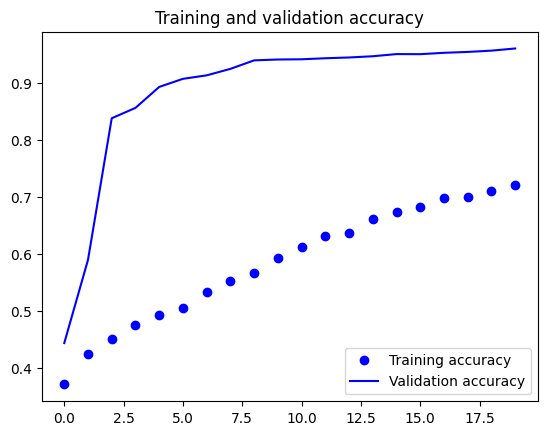

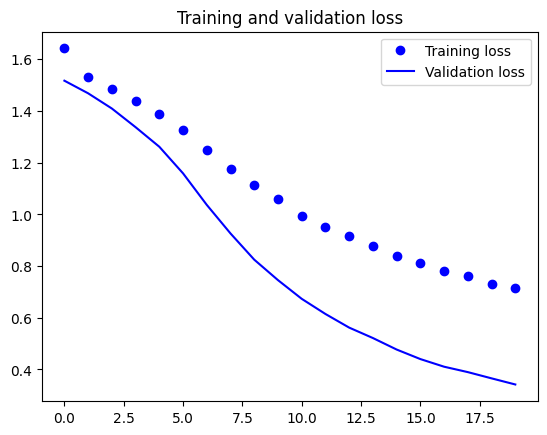

In [20]:
accuracy = riesgo_train.history['accuracy']
val_accuracy = riesgo_train.history['val_accuracy']
loss = riesgo_train.history['loss']
val_loss = riesgo_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predicted_classes2 = riesgo_model.predict(test_X)

1301/1301 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [22]:
predicted_classes=[]
for predicted_riesgo in predicted_classes2:
    predicted_classes.append(predicted_riesgo.tolist().index(max(predicted_riesgo)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

((41630,), (41630,))

Found 39997 correct labels


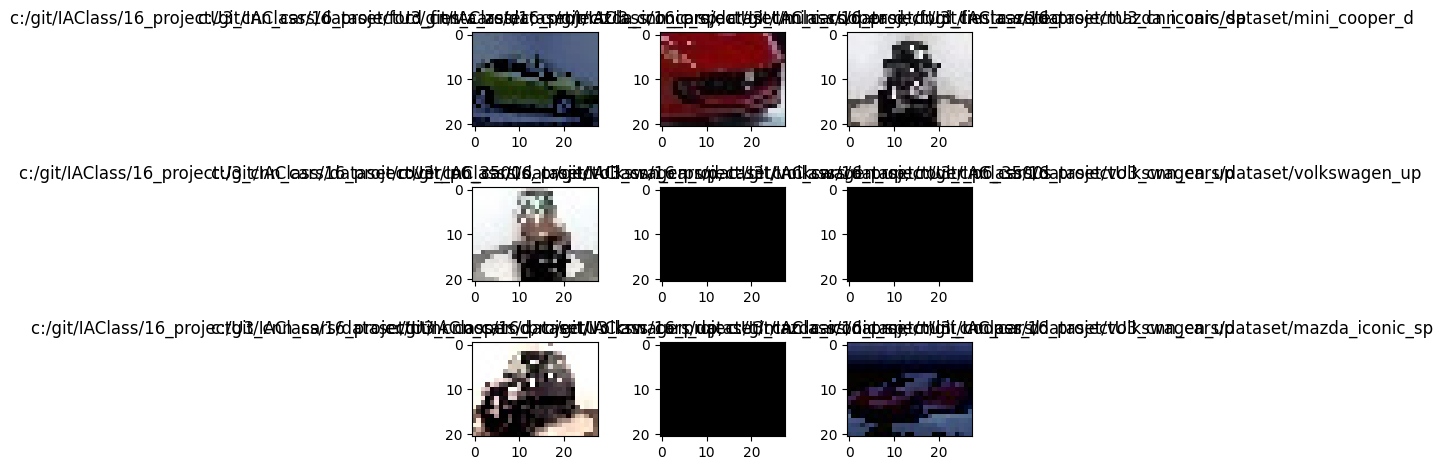

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[correct]],
                                                    sriesgos[test_Y[correct]]))

    plt.tight_layout()

Found 1633 incorrect labels


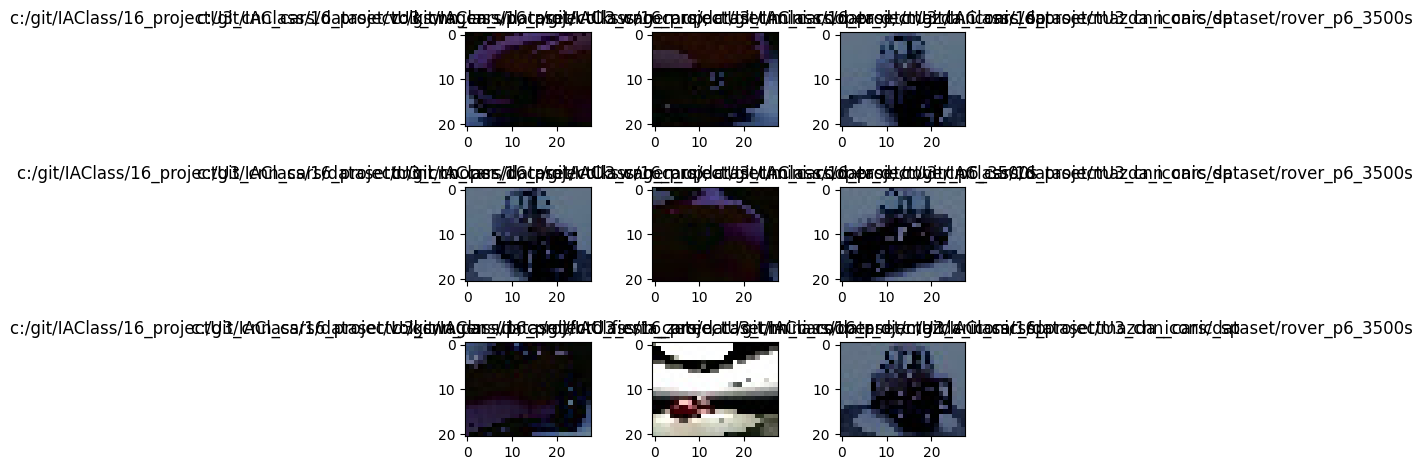

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sriesgos[predicted_classes[incorrect]],
                                                    sriesgos[test_Y[incorrect]]))
    plt.tight_layout()

In [26]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      8222
     Class 1       1.00      0.94      0.97      8985
     Class 2       0.88      1.00      0.94      8182
     Class 3       1.00      0.87      0.93      7904
     Class 4       0.96      1.00      0.98      8337

    accuracy                           0.96     41630
   macro avg       0.96      0.96      0.96     41630
weighted avg       0.96      0.96      0.96     41630



In [27]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/git/IAClass/16_projectU3_cnn_cars/test_image/fiesta.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21,28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = riesgo_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], sriesgos[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
C:/git/IAClass/16_projectU3_cnn_cars/test_image/fiesta.png c:/git/IAClass/16_projectU3_cnn_cars/dataset/volkswagen_up


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model

# Cargar el modelo h5
modelo_h5 = 'C:/git/IAClass/16_projectU3_cnn_cars/dataset_trained/v1/chatarras.keras'
riesgo_model = load_model(modelo_h5)

images = []
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/git/IAClass/16_projectU3_cnn_cars/test_image/test3.jpg']

for filepath in filenames:
    image = plt.imread(filepath)
    image_resized = resize(image, (21,28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = riesgo_model.predict(test_X)

# Asegúrate de tener una lista de etiquetas o categorías en 'sriesgos'
sriesgos = ['ford_fiesta_zetec', 'mazda_iconic_sp', 'mini_cooper_d', 'rover_p6_3500s', 'volkswagen_up']  # Reemplaza con tus etiquetas reales
# sriesgos = ['ford_fiesta_zetec', 'mazda_iconic_sp']  # Reemplaza con tus etiquetas reales

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], sriesgos[np.argmax(img_tagged)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
C:/git/IAClass/16_projectU3_cnn_cars/test_image/test3.jpg rover_p6_3500s
